In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

In [3]:
train = pd.read_csv("train.csv")
train.Loan_Status=train.Loan_Status.map({'Y':1,'N':0})
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
Loan_status=train.Loan_Status
train.drop('Loan_Status',axis=1,inplace=True)
test=pd.read_csv('test.csv')
Loan_ID=test.Loan_ID
data=train.append(test)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [6]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

In [7]:
data.Dependents.dtypes

dtype('O')

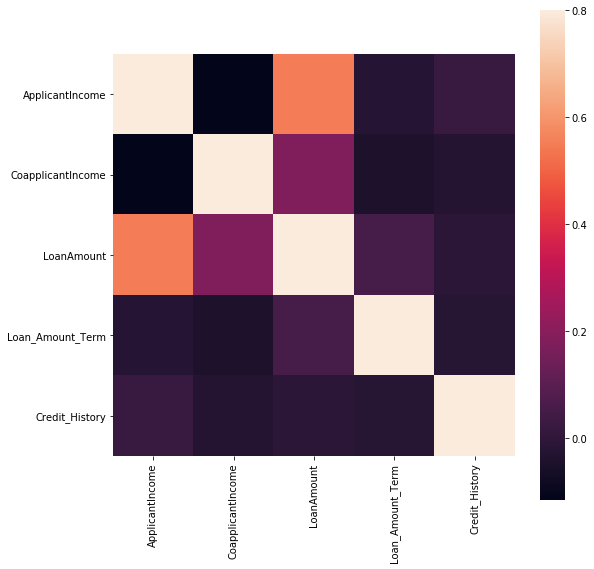

In [9]:
corrmat=data.corr()
f,ax = plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [10]:
data.Gender = data.Gender.map({'Male':1,'Female':0})
data.Gender.value_counts()

1.0    775
0.0    182
Name: Gender, dtype: int64

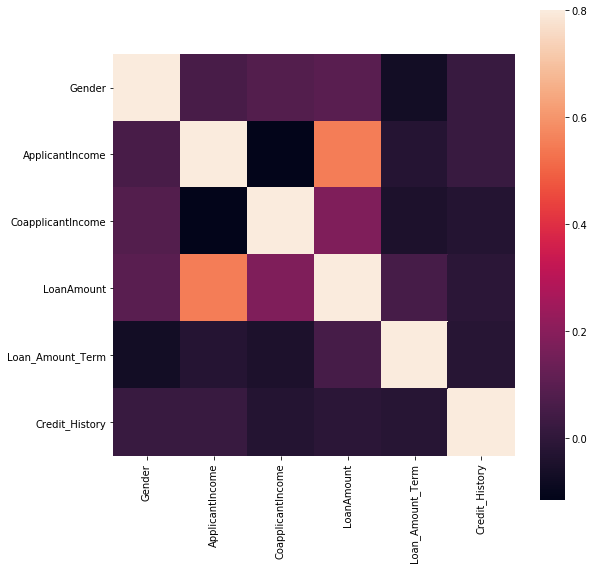

In [11]:
corrmat = data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [12]:
data.Married=data.Married.map({'Yes':1,'No':0})

In [13]:
data.Married.value_counts()

1.0    631
0.0    347
Name: Married, dtype: int64

In [14]:
data.Dependents=data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [16]:
data.Dependents.value_counts()

Series([], Name: Dependents, dtype: int64)

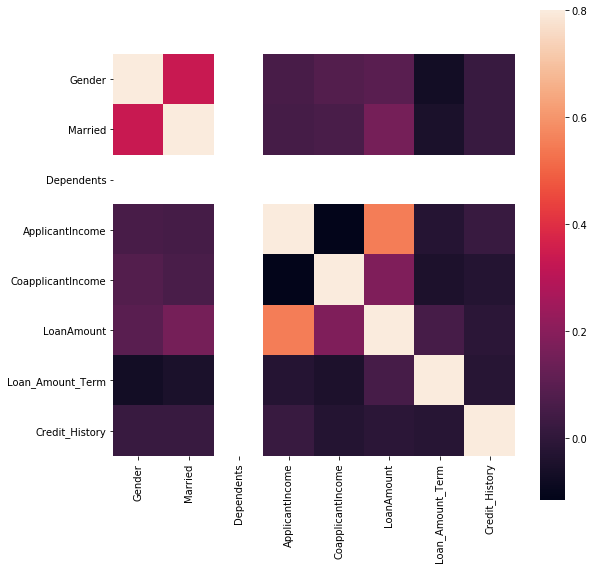

In [17]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [18]:
data.Education=data.Education.map({'Graduate':1,'Not Graduate':0})

In [19]:
data.Education.value_counts()

1    763
0    218
Name: Education, dtype: int64

In [20]:
data.Self_Employed=data.Self_Employed.map({'Yes':1,'No':0})

In [21]:
data.Self_Employed.value_counts()

0.0    807
1.0    119
Name: Self_Employed, dtype: int64

In [22]:
data.Property_Area.value_counts()

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

In [23]:
data.Property_Area=data.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})

In [24]:
data.Property_Area.value_counts()


1    349
2    342
0    290
Name: Property_Area, dtype: int64

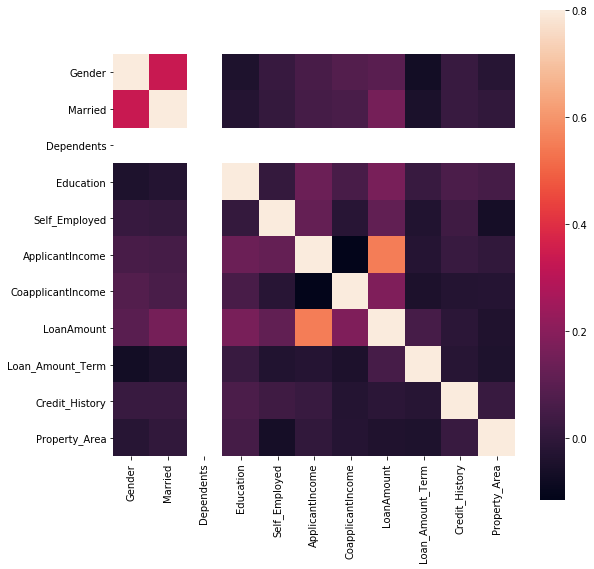

In [25]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [26]:

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1.0,0.0,NaN,1,0.0,5849,0.0,NaN,360.0,1.0,2
1,LP001003,1.0,1.0,NaN,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,LP001005,1.0,1.0,NaN,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,LP001006,1.0,1.0,NaN,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,LP001008,1.0,0.0,NaN,1,0.0,6000,0.0,141.0,360.0,1.0,2


In [27]:
data.Credit_History.size

981

In [28]:
data.Credit_History.fillna(np.random.randint(0,2),inplace=True)

In [29]:
data.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents           981
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History         0
Property_Area          0
dtype: int64

In [30]:
data.Married.fillna(np.random.randint(0,2),inplace=True)

In [31]:
data.isnull().sum()

Loan_ID                0
Gender                24
Married                0
Dependents           981
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History         0
Property_Area          0
dtype: int64

In [32]:
data.LoanAmount.fillna(data.LoanAmount.median(),inplace=True)

In [33]:
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(),inplace=True)

In [34]:
data.isnull().sum()

Loan_ID                0
Gender                24
Married                0
Dependents           981
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
dtype: int64

In [35]:
data.Gender.value_counts()

1.0    775
0.0    182
Name: Gender, dtype: int64

In [37]:
data.Gender.fillna(np.random.randint(0,2),inplace=True)

In [38]:
data.Gender.value_counts()

1.0    799
0.0    182
Name: Gender, dtype: int64

In [39]:
data.Dependents.fillna(data.Dependents.median(),inplace=True)

In [40]:
data.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents           981
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
dtype: int64

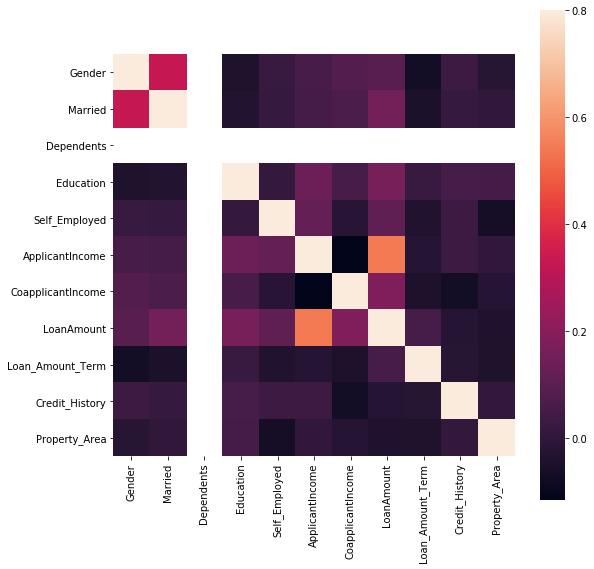

In [41]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [42]:
data.Self_Employed.fillna(np.random.randint(0,2),inplace=True)

In [43]:
data.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents           981
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
dtype: int64

In [44]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1.0,0.0,NaN,1,0.0,5849,0.0,126.0,360.0,1.0,2
1,LP001003,1.0,1.0,NaN,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,LP001005,1.0,1.0,NaN,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,LP001006,1.0,1.0,NaN,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,LP001008,1.0,0.0,NaN,1,0.0,6000,0.0,141.0,360.0,1.0,2


In [45]:
data.drop('Loan_ID',inplace=True,axis=1)

In [46]:
data.isnull().sum()

Gender                 0
Married                0
Dependents           981
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
dtype: int64

In [51]:
train_X=data.iloc[:614,]
train_y=Loan_status
X_test=data.iloc[614:,]
seed=7
train_X,test_X,train_y,test_y=train_test_split(train_X,train_y,random_state=seed)

In [52]:
models=[]
models.append(("logreg",LogisticRegression()))
models.append(("tree",DecisionTreeClassifier()))
models.append(("lda",LinearDiscriminantAnalysis()))
models.append(("svc",SVC()))
models.append(("knn",KNeighborsClassifier()))
models.append(("nb",GaussianNB()))

In [54]:
seed=7
scoring='accuracy'
result=[]
names=[]

In [57]:
df_output=pd.DataFrame()

In [65]:
df=df_output[['Loan_ID']].to_csv('output.csv',index=False)
